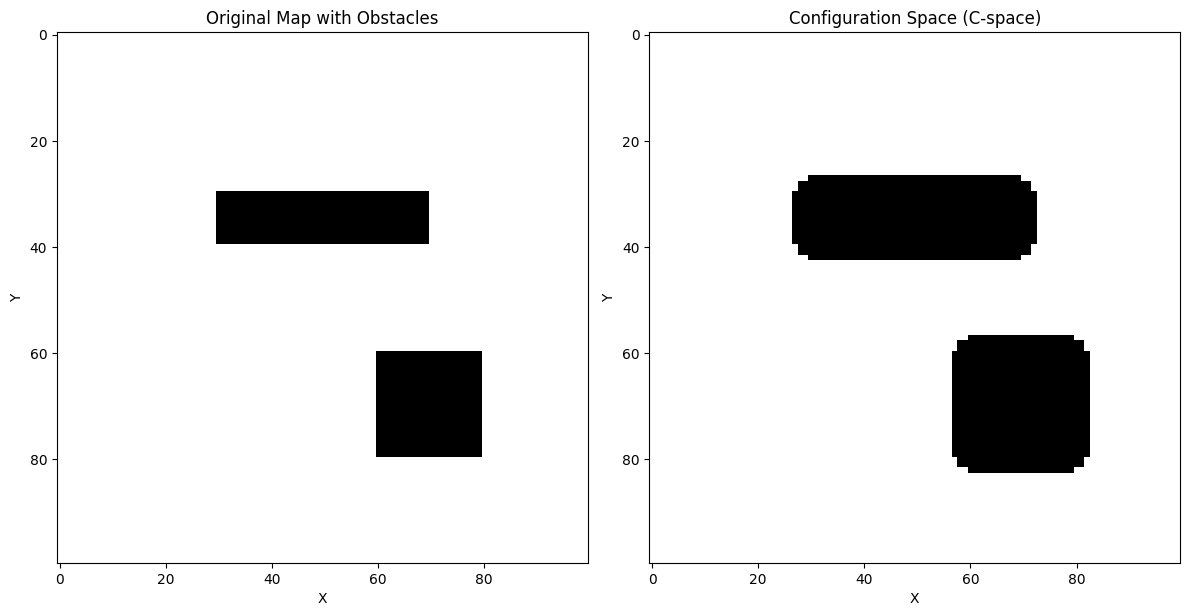

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation

# === Configuration ===
grid_size = (100, 100)
robot_radius = 3  # cells

# Create empty grid
c_space = np.zeros(grid_size, dtype=int)

# === Define Obstacles (occupancy grid style) ===
# Rectangular obstacle
c_space[30:40, 30:70] = 1

# Another rectangle
c_space[60:80, 60:80] = 1

# === Inflate obstacles to account for robot size ===
# Structuring element = circular robot shape
structuring_element = np.zeros((2*robot_radius+1, 2*robot_radius+1), dtype=bool)
for i in range(2*robot_radius+1):
    for j in range(2*robot_radius+1):
        if np.sqrt((i-robot_radius)**2 + (j-robot_radius)**2) <= robot_radius:
            structuring_element[i, j] = True

# Dilate obstacles to create C-obstacle
c_space_dilated = binary_dilation(c_space, structure=structuring_element)

# === Visualization ===
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(c_space, cmap='gray_r')
axs[0].set_title("Original Map with Obstacles")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

axs[1].imshow(c_space_dilated, cmap='gray_r')
axs[1].set_title("Configuration Space (C-space)")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")

plt.tight_layout()
plt.show()
